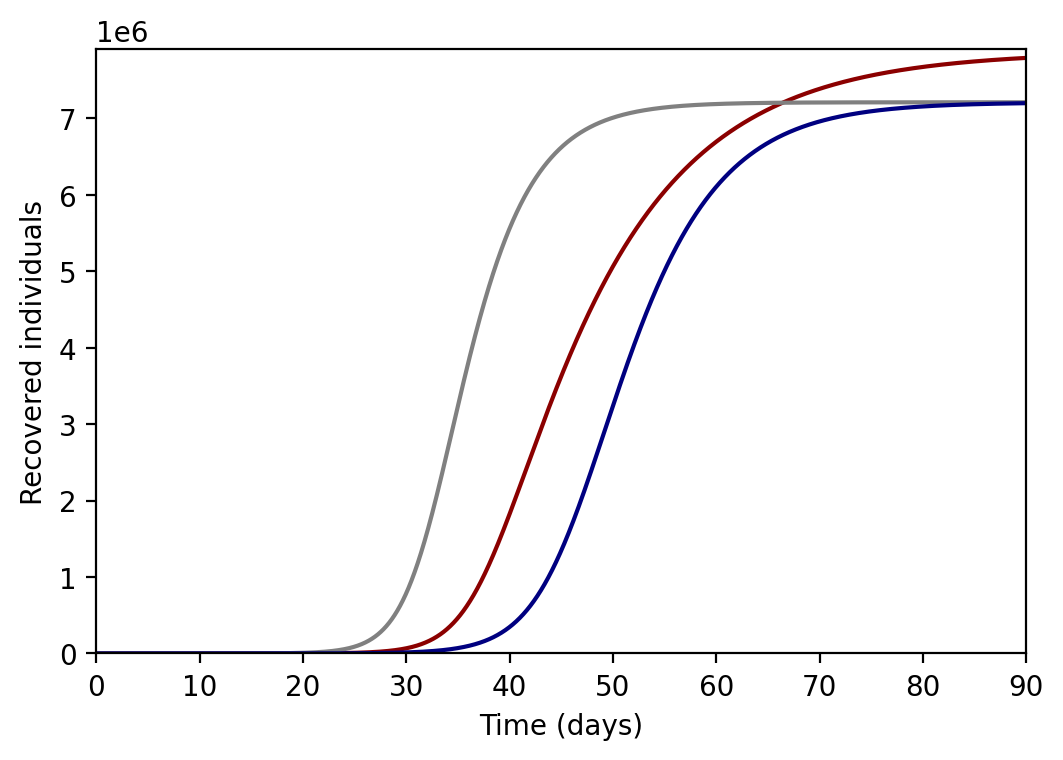

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt
def det_plotter(y0,t,N,beta,gamma,colo,labe):
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T    
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    plt.xlabel("Time (days)")
    plt.ylabel("Recovered individuals")
    plt.ylim(0,N+1)
    plt.xlim(0,90)
    plt.plot(t,R,color=colo,label=labe)
    #plt.plot(t,R,"--",color="darkred")
    #plt.show()
    #plt.close()
erre0=2.67
gamma=1/5.0
beta=erre0*gamma
S0=7900000
I0=1
R0=0
N=S0+I0
dt=0.01
# Initial conditions vector
y0 = S0, I0, R0
times=[0.0+i*dt for i in range(10000)]
times=np.array(times)
det_plotter(y0,times,N,5.65/11,1/11.,"darkred",r"$\mathcal{R}_0=5,65,\; \gamma=1/11\;$ days $^{-1}$")
det_plotter(y0,times,N,2.67/3.5,1/3.5,"gray",r"$\mathcal{R}_0=2,67,\; \gamma=1/3,5\;$ days $^{-1}$")
det_plotter(y0,times,N,2.67/5,1/5,"navy",r"$\mathcal{R}_0=2,67,\; \gamma=1/5\;$ days $^{-1}$")

aux
0
1
2
3
4


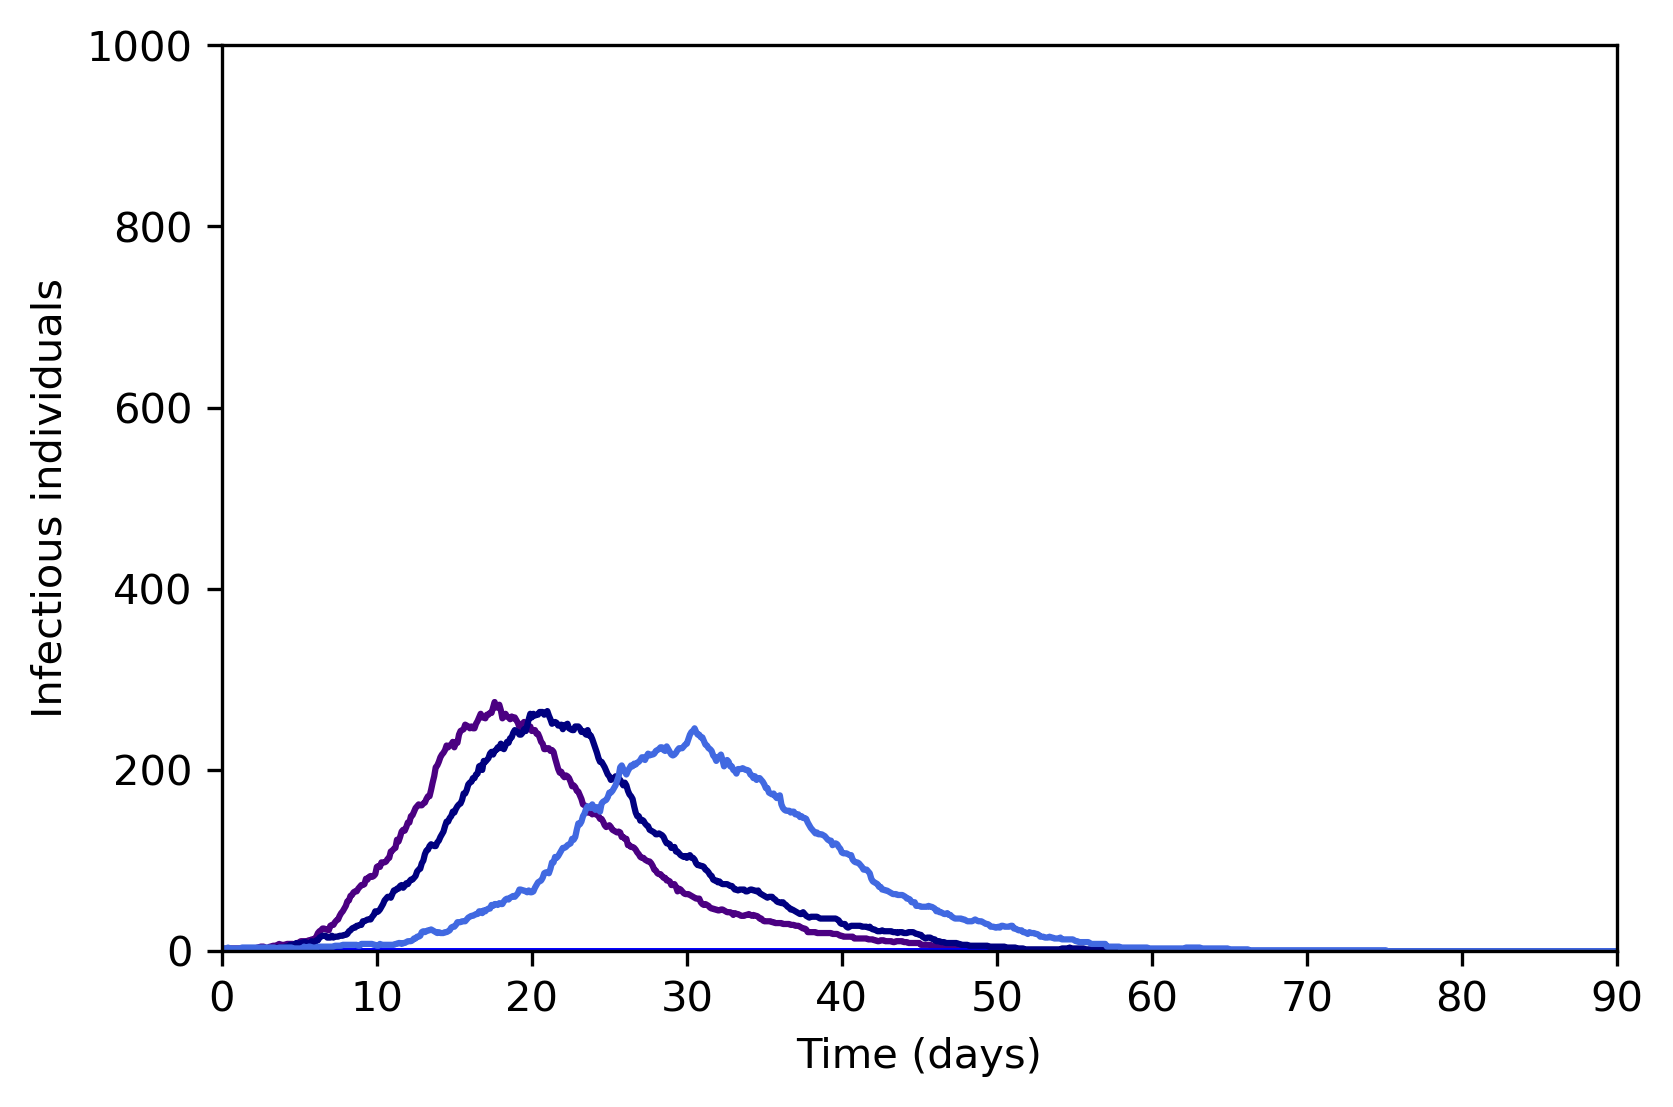

In [13]:
import numpy as np
import pylab as plt
import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib as mpl
### You may want to try with popylation size of 50 (small) to see the events
### In this case uncomment the next line
#N0=50.0
S0=1000
I0=2
R0=0
beta=2.67/5
gamma=0.2
popsize=S0+I0
nreacciones=2
Tmax=90.0
tau=0.1
np.random.seed(1)
print("aux")
def find(condition):
    res, = np.nonzero(np.ravel(condition))
    return res
    
def stoc_eqs(INP,beta,gamma,N,nreacciones): 
    V = INP
    Rate=np.zeros((nreacciones))
    Change=np.zeros((nreacciones,len(V)))
    N=V[0]+V[1]+V[2]
    Rate[0] = beta*V[0]*V[1]/N; Change[0,:]=([-1, +1, 0])
    Rate[1] = gamma*V[1];  Change[1,:]=([0, -1, +1])
    for i in range(nreacciones):
        K_i=np.random.poisson(Rate[i]*tau)
        K_i=min([K_i, V[find(Change[i,:]<0)]])
        V=V+Change[i,:]*K_i
    return V

def Stoch_Iteration(INPUT,beta,gamma,N,nreacciones,T):
    lop=0
    S=[]
    I=[]
    R=[]
    SI=[]
    for lop in T:
        res = stoc_eqs(INPUT,beta,gamma,N,nreacciones)
        S.append(INPUT[0])
        I.append(INPUT[1])
        R.append(INPUT[2])
        SI.append((INPUT[0],INPUT[1]))
        INPUT=res
    return S,I,R
def one_trajectory(S0,I0,R0,beta,gamma,N,nreacciones,Tmax,tau):
    INPUT = np.array((S0,I0,R0))
    T=np.arange(0.0, Tmax, tau)
    [S,I,R]=Stoch_Iteration(INPUT,beta,gamma,N,nreacciones,T)
    return S,I,R
colors=["blueviolet","indigo","blue","navy","royalblue"]
plt.rcParams['figure.dpi'] = 300
T=np.arange(0.0, Tmax, tau)
nsims=5
for l in range(nsims):
    print(l)
    S,I,R=one_trajectory(S0,I0,R0,beta,gamma,popsize,nreacciones,Tmax,tau)
    plt.plot(T,I,color=colors[l])
plt.xlabel("Time (days)")
plt.ylabel("Infectious individuals")
plt.ylim(0,1000)
plt.xlim(0,90)
plt.show()
Rinf=[]
for l in range(5000):
    S,I,R=one_trajectory(S0,I0,R0,beta,gamma,popsize,nreacciones,Tmax,tau)
    Rinf.append(R[-1])


0
1
2
3
4


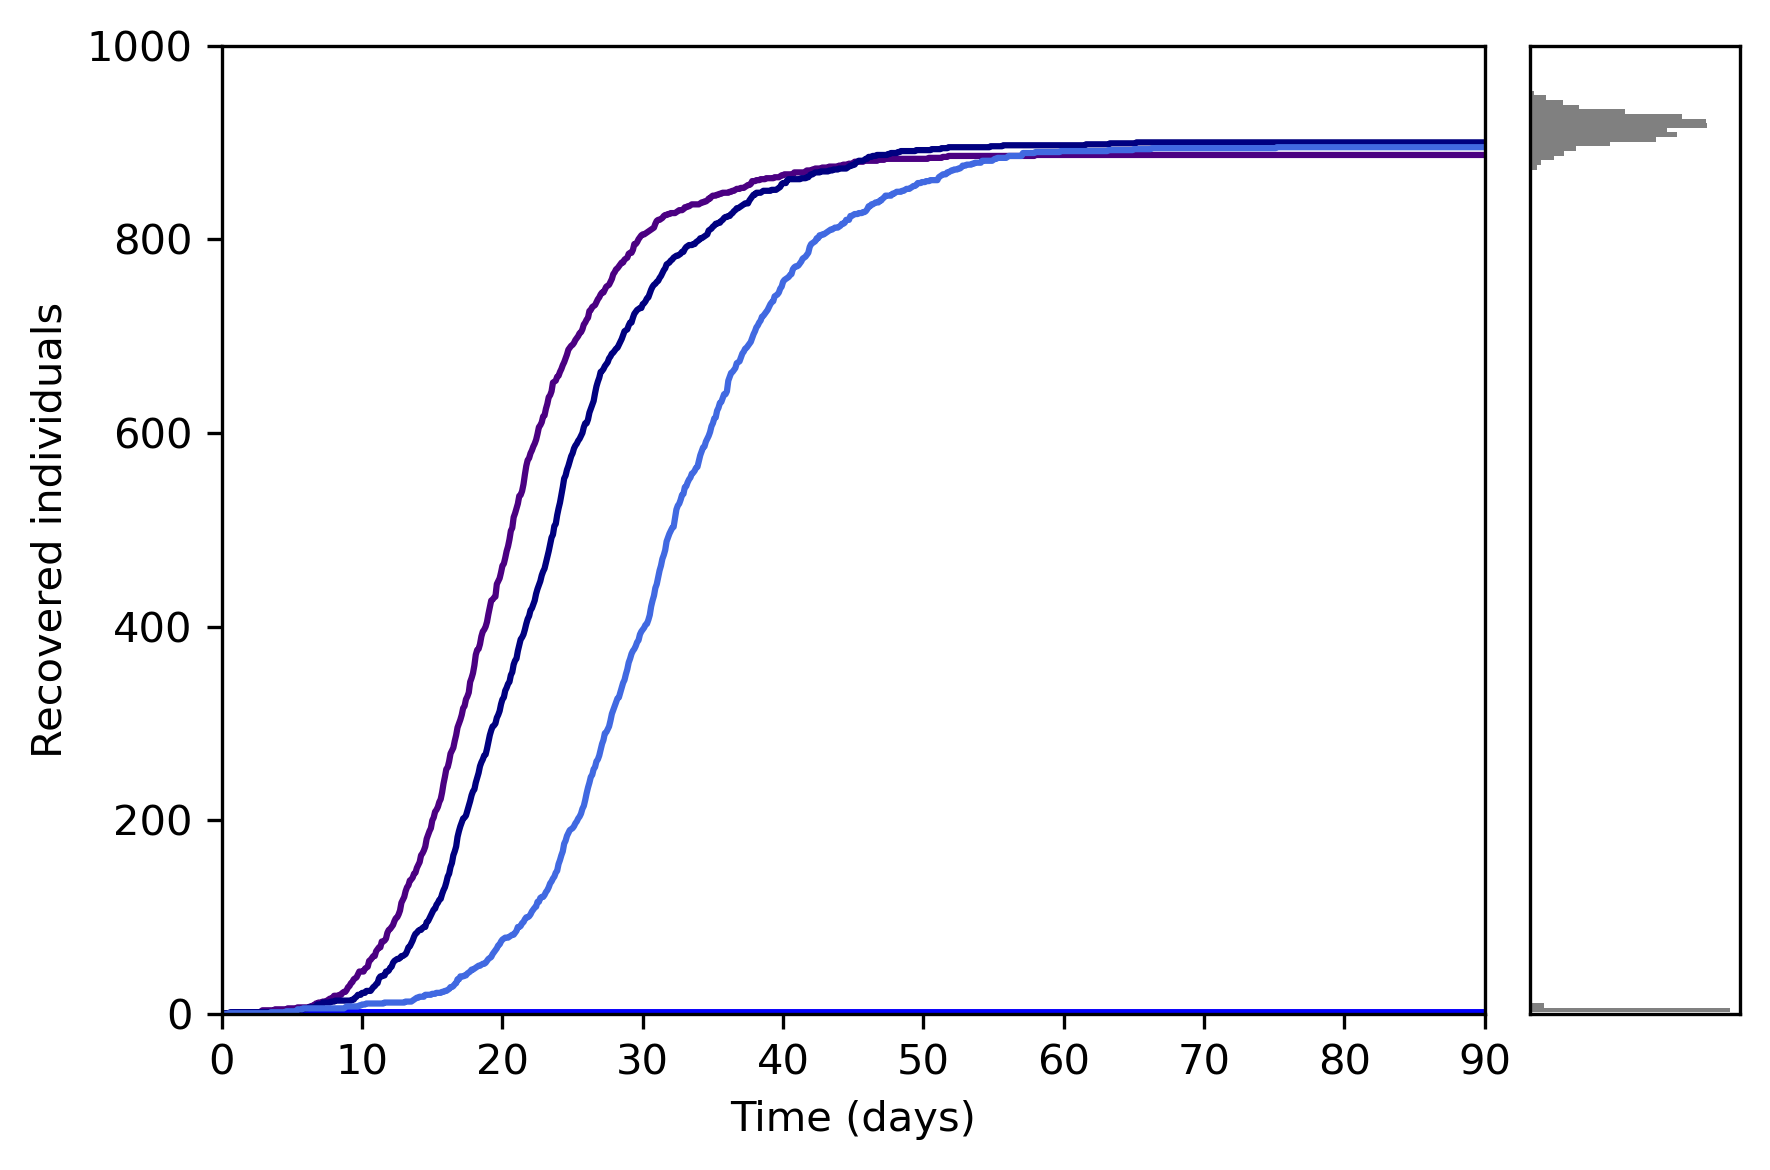

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,gridspec_kw={'width_ratios': [6, 1]})
np.random.seed(1)
for l in range(nsims):
    print(l)
    S,I,R=one_trajectory(S0,I0,R0,beta,gamma,popsize,nreacciones,Tmax,tau)
    ax1.plot(T,R,color=colors[l])

ax2.hist(Rinf,bins=200,orientation="horizontal",color="gray")
ax2.tick_params(bottom = False,left=False)
ax2.set_xticklabels([])
ax1.set_xlabel("Time (days)")
ax1.set_ylabel("Recovered individuals")
ax1.set_ylim(0,1000)
ax1.set_xlim(0,90)
f.tight_layout()